In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_JPM.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,110.92,111.000,109.12,109.94,15161565,2019-04-15,106.0199,2019-04-15,66.8310,2019-04-15,68.5395
1,1,2019-04-12,109.44,111.850,108.88,111.21,25834073,2019-04-12,105.4168,2019-04-12,72.6585,2019-04-12,77.1985
2,2,2019-04-11,105.71,106.730,105.56,106.23,11183845,2019-04-11,104.5255,2019-04-11,59.9390,2019-04-11,64.7836
3,3,2019-04-10,105.13,105.715,104.47,105.34,10882304,2019-04-10,104.2633,2019-04-10,56.5875,2019-04-10,52.6597
4,4,2019-04-09,105.08,105.200,104.25,104.87,9092188,2019-04-09,104.0976,2019-04-09,54.7303,2019-04-09,45.0028


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    109.94
1    111.21
2    106.23
3    105.34
4    104.87
Name: close, dtype: float64

In [7]:
len(close)

5341

In [8]:
train = close.loc[:len(close) -   int(len(close)*0.15)  -1]
test = close.loc[len(close) -   int(len(close)*0.15) :]
print(train.tail())
print(test.head())

4535    40.56
4536    43.48
4537    43.77
4538    41.92
4539    41.48
Name: close, dtype: float64
4540    42.27
4541    41.05
4542    40.66
4543    37.93
4544    39.19
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

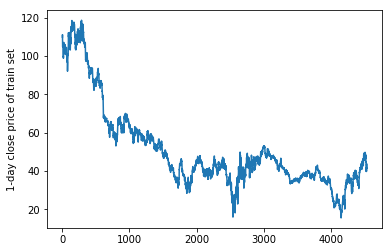

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

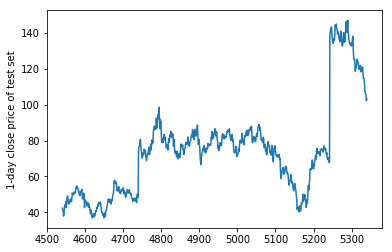

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

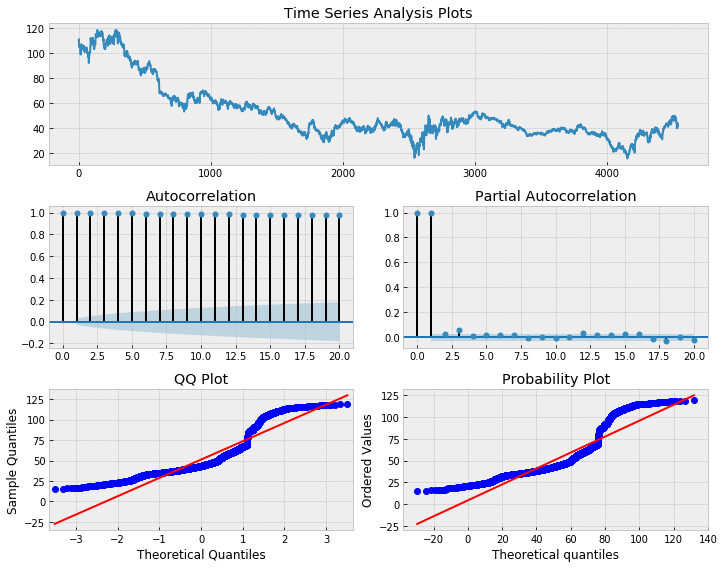

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-2.4206978712380858,
 0.13597959746634913,
 5,
 4534,
 {'1%': -3.4317930979518474,
  '5%': -2.862177678822453,
  '10%': -2.5671094396870853},
 12441.927978125768)

Text(0,0.5,'Difference in 1-day close price')

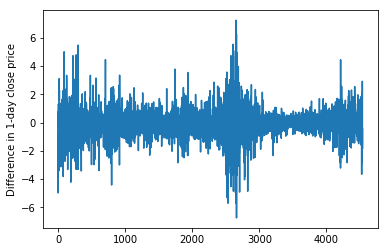

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-32.780021577608125,
 0.0,
 4,
 4534,
 {'1%': -3.4317930979518474,
  '5%': -2.862177678822453,
  '10%': -2.5671094396870853},
 12444.171652721267)

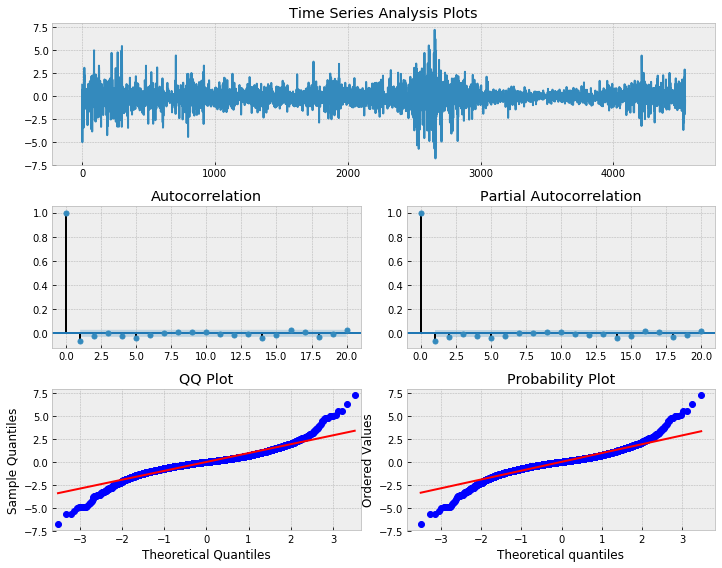

In [15]:
tsplot(train_diff, lags=20)

### Fit Model

In [16]:
arima210 = smt.ARIMA(train, (2,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima210_fit = arima210.fit() #change model name*2
arima210_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -6274.284
Method:                       css-mle   S.D. of innovations              0.964
Date:                Wed, 17 Apr 2019   AIC                          12556.567
Time:                        15:52:42   BIC                          12582.249
Sample:                             1   HQIC                         12565.612
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0151      0.013     -1.150      0.250      -0.041       0.011
ar.L1.D.close    -0.0664      0.015     -4.475      0.000      -0.095      -0.037
ar.L2.D.close    -0.0265      0.015     -1.778      0.076      -0.056       0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2548           -6.0180j            6.1474           -0.2827
AR.2           -1.2548           +6.0180j            6.1474            0.2827
-----------------------------------------------------------------------------
"""

In [17]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6275.373
Method:                       css-mle   S.D. of innovations              0.964
Date:                Wed, 17 Apr 2019   AIC                          12556.745
Time:                        15:53:21   BIC                          12576.006
Sample:                             1   HQIC                         12563.529
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0151      0.013     -1.131      0.258      -0.041       0.011
ma.L1.D.close    -0.0681      0.015     -4.489      0.000      -0.098      -0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           14.6897           +0.0000j           14.6897            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
arima111 = smt.ARIMA(train, (1,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima111_fit = arima111.fit() #change model name*2
arima111_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6272.215
Method:                       css-mle   S.D. of innovations              0.964
Date:                Wed, 17 Apr 2019   AIC                          12552.429
Time:                        15:54:00   BIC                          12578.111
Sample:                             1   HQIC                         12561.474
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0150      0.012     -1.254      0.210      -0.038       0.008
ar.L1.D.close     0.6509      0.134      4.840      0.000       0.387       0.914
ma.L1.D.close    -0.7088      0.125     -5.658      0.000      -0.954      -0.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5364           +0.0000j            1.5364            0.0000
MA.1            1.4107           +0.0000j            1.4107            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
arima211 = smt.ARIMA(train, (2,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima211_fit = arima211.fit() #change model name*2
arima211_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -6271.069
Method:                       css-mle   S.D. of innovations              0.963
Date:                Wed, 17 Apr 2019   AIC                          12552.138
Time:                        16:01:58   BIC                          12584.241
Sample:                             1   HQIC                         12563.445
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0149      0.011     -1.312      0.190      -0.037       0.007
ar.L1.D.close     0.7971      0.103      7.759      0.000       0.596       0.998
ar.L2.D.close     0.0326      0.021      1.569      0.117      -0.008       0.073
ma.L1.D.close    -0.8651      0.101     -8.535      0.000      -1.064      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1960           +0.0000j            1.1960            0.0000
AR.2          -25.6260           +0.0000j           25.6260            0.5000
MA.1            1.1559           +0.0000j            1.1559            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

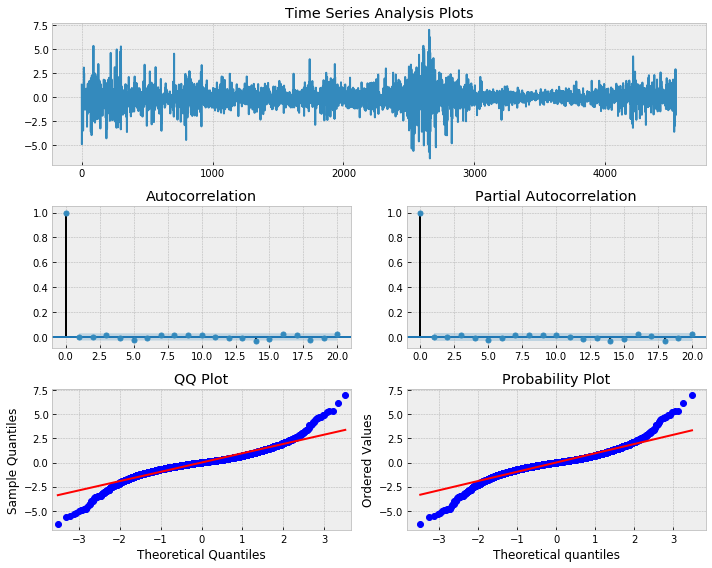

In [32]:
tsplot(arima211_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [36]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima210_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([10.80743759]), array([0.05533446]))

### Forecasting

In [22]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima111_fit.forecast(steps=num_steps)   #change model name

In [23]:
arima111_fit.forecast(steps=num_steps)   #change model name

(array([41.50646778, 41.51847419, 41.52106817, 41.5175359 , 41.51001625]),
 array([0.96358903, 1.32380612, 1.58484389, 1.79730714, 1.98066079]),
 array([[39.61786799, 43.39506756],
        [38.92386188, 44.1130865 ],
        [38.41483121, 44.62730512],
        [37.99487864, 45.04019315],
        [37.62799243, 45.39204007]]))

In [24]:
arima111_fit.forecast(steps=num_steps)[0][4]    #change model name

41.5100162497944

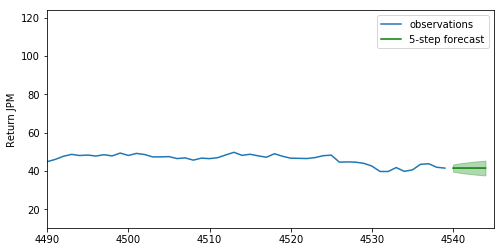

In [25]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return JPM')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [34]:
pred = []
for i in range(  int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -   int(len(close)*0.15)  -5 + i]
    moving_arima211 = smt.ARIMA(moving_train, (2,1,1))   #change model parameters  & model name
    moving_arima211_fit = moving_arima211.fit()   #change model name*2
    
    pred.append(moving_arima211_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


801

In [35]:
#(2,1,1)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9534713214932882
MAE = 4.005235372292699
RMSE = 7.502521949694967
Scaled MAE = 0.036371552599824726
Scaled RMSE = 0.06813042090169784


In [37]:
pred = []
for i in range(  int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -   int(len(close)*0.15)  -5 + i]
    moving_arima210 = smt.ARIMA(moving_train, (2,1,0))   #change model parameters  & model name
    moving_arima210_fit = moving_arima210.fit()   #change model name*2
    
    pred.append(moving_arima210_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

801

In [38]:
#(2,1,0)
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9537826670757197
MAE = 3.9860466808849346
RMSE = 7.477378340560291
Scaled MAE = 0.0361973000443601
Scaled RMSE = 0.06790209172321368
